# Bike Sharing Assignment

#### Probelm Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. It aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Importing dataset
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset has no null values and variuos data types can be noted from above.

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Dropping the unnecessary columns ::instant(just a count), 
#dteday (not a timeseries analysis), registered & casual as they both add t cnt

bikes = bikes.drop(['instant','dteday','registered','casual'], axis =1)
bikes.shape

(730, 12)

In [7]:
#creating the new column days_old which signifies how old the record is. This is done by taking the index as count as it is continuous data.
bikes=bikes.reset_index(drop=False)
bikes['days_old']= bikes['index']
bikes=bikes.drop('index', axis=1)
bikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [8]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
days_old      730 non-null int64
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


Let us look at the numeric variables, specially: temp, atemp, hum, windspeed, cnt

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Univariate Analysis ::<br>
Numerical

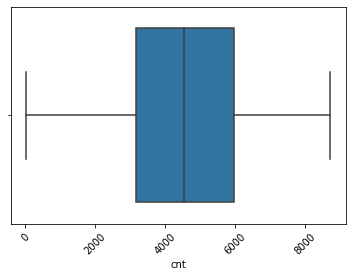

In [11]:
sns.boxplot(bikes.cnt)
plt.xticks(rotation=45)
plt.show()

In [12]:
bikes.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

The target variable `cnt` has the above summary statistics. With minimum of 22 and max of 8714 in a single day. Also, median is 4548 and mean is 4508.  

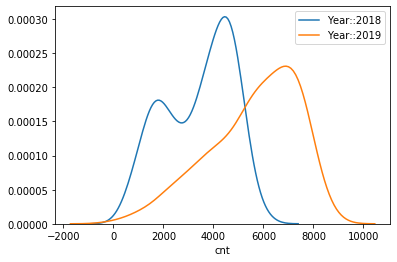

In [13]:
yr = [0, 1]
dict1= {0: "2018", 1:"2019"}
for i in yr:
    subset = bikes[bikes['yr']==i]
    str1= "Year::"+ dict1[i]
    sns.distplot(subset['cnt'], hist = False, label= str1)

The above density plots are year wise. Depicting probability on the y axis and cnt on x axis.

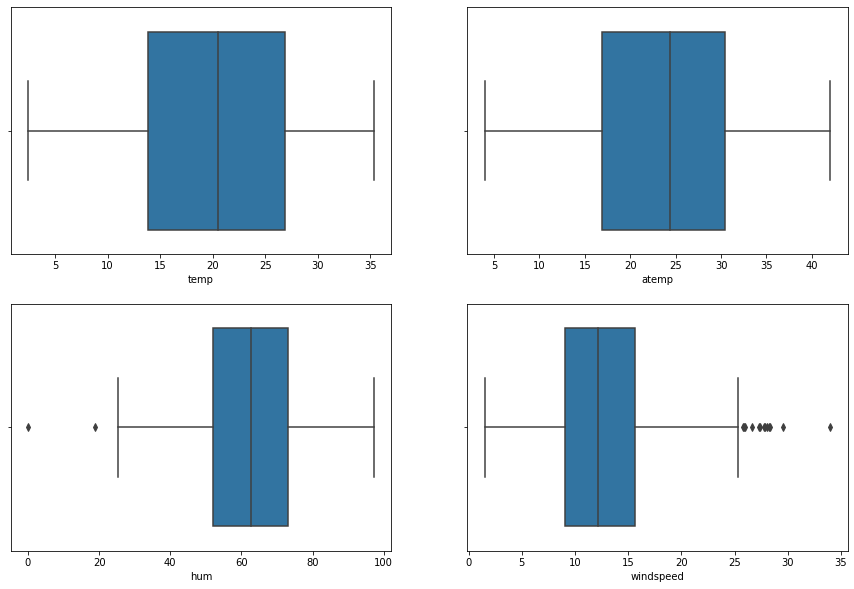

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'temp', data = bikes )
plt.subplot(2,2,2)
sns.boxplot(x = 'atemp', data = bikes)
plt.subplot(2,2,3)
sns.boxplot(x = 'hum', data = bikes)
plt.subplot(2,2,4)
sns.boxplot(x = 'windspeed',data = bikes)
plt.show()


In [15]:
bikes[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


The above boxplot and summary statistics provides various insights into the weather of the place i.e.; we looked into the various parameters like `temp` `atemp, 'hum` and `windspeed`.


#### Bivariate Analysis: 

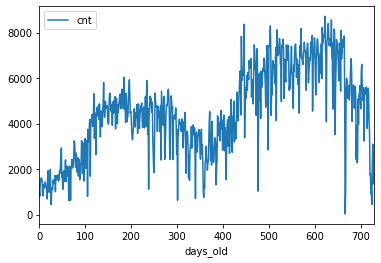

In [16]:
bikes.plot.line(x='days_old', y='cnt')
plt.show()

We can infer from the above lineplot, that the usage of the service has shown a positive increasing trend in pre Coronavirus era, despite a small dip at various time slots.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

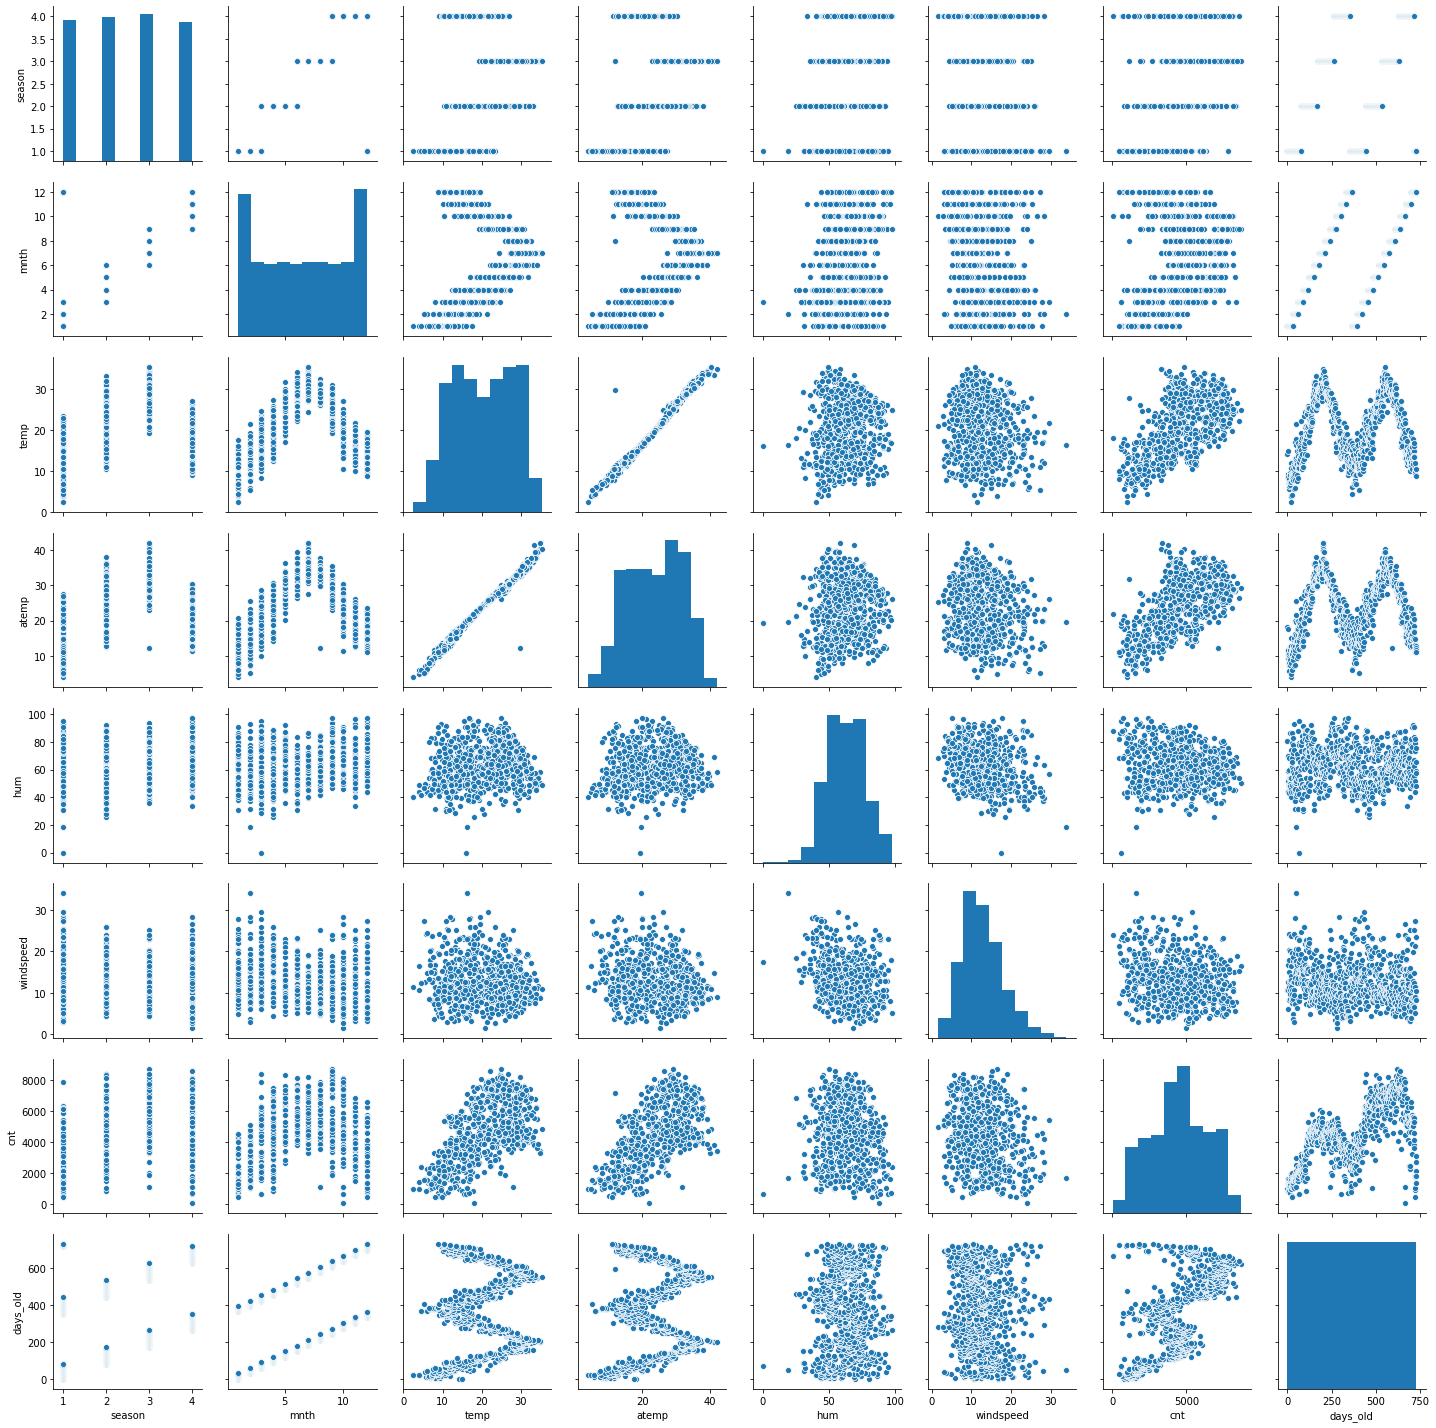

In [17]:
#choosing some numeric variables , as others like season, yr, etc are actually categorical ones.
num_day= bikes[['season','mnth','temp', 'atemp', 'hum', 'windspeed', 'cnt','days_old']]
sns.pairplot(num_day)
plt.show()

In [18]:
def fun_heatmap_plot(corr_matrix):
    sns.set(font_scale=0.7)
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(corr_matrix,cmap=sns.diverging_palette(20, 120, n=100),linewidths=.1,square=True, annot=True)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right')
    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5);

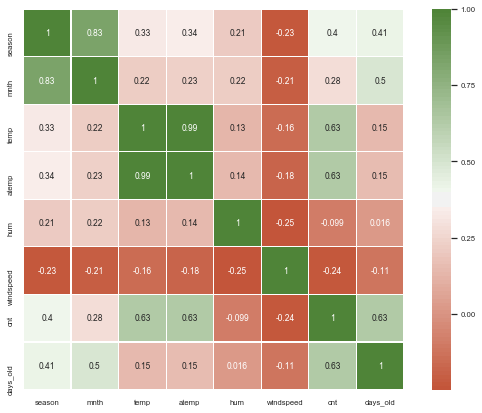

In [19]:
fun_heatmap_plot(num_day.corr())

The above mentioned pairplot and hetamap depict that there is strong correlation between the following pairs::
<br>Among the independent variables 
- `atemp` and `temp ` :: 0.99
- `mnth` and `season` :: 0.83 <br>
Between the dependent variable and independent variables:
- `cnt` and `temp` :: 0.63
- `cnt` and `atemp` ::0.63
- `cnt` and `days_old` :: 0.63
- `cnt` and `season` :: 0.4

First, depicts certain collinearity between the independent variable pairs, like, atemp-- temp and mnth-- season.<br>
Second, guides us at the most important variables to start with.

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [20]:
#Converting the Categorical variable values to meaningful ones.
bikes.season=bikes.season.map({1: "spring", 2: "summer", 3:"fall", 4:"winter"})
bikes.mnth = bikes.mnth.map({1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7: "July", 8:"Aug", 9:"Sep", 10:"Oct", 11: "Nov", 12:"Dec"})
bikes.weathersit=bikes.weathersit.map({1: "clear_weather", 2: "mist_weather", 3:"light_weather", 4:"extreme_weather"})
bikes.weekday=bikes.weekday.map({0:"Sunday" ,1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})

In [21]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
days_old      730 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [22]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,Jan,0,Saturday,0,mist_weather,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Sunday,0,mist_weather,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,Jan,0,Monday,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Tuesday,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Wednesday,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600,4


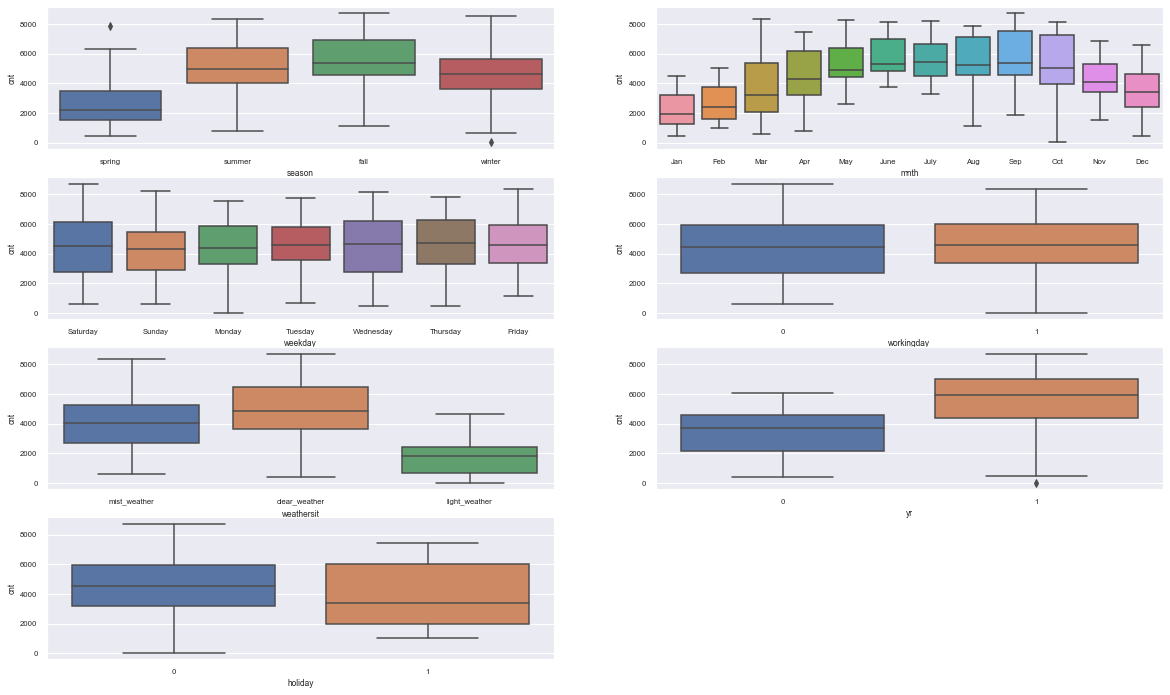

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(4,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(4,2,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.show()

`Season Vs cnt`:  Median Values of cnt change significantly among the various seasons. So, it will be among the important variables to look for. <br>
`Mnth Vs cnt`: Median Values of cnt change significantly among the various months. So, it will be among the important variables to look for.<br>
`Weekday Vs cnt`:  Median varies very slightly for different weekdays in the two years. But we notice different IQR for different days.<br>
`Workingday Vs cnt`:  We notice overlapped data for the two values here. Also, the median appears to be same. So it will be insignificant for the modelling.<br>
`Weathersit Vs cnt`: Median varies across different weather conditions. Clear_weather stood as a priority in terms renting bikes.<br>
`Yr vs cnt`:   2019 year has much higher demand overall in comparison to 2018. It will be a significant in modelling.<br>
`Holiday vs cnt`:   Median values for both the values differ a lot. It will be important for modelling. 

In [24]:
df1=bikes.groupby(['season','yr'])['cnt']
df1.describe()

count         mean          std     min      25%     50%      75%  \
season yr                                                                      
fall   0    94.0  4464.361702   798.348077  1115.0  4179.25  4615.5  4877.25   
       1    94.0  6824.244681   912.756191  4073.0  6230.50  6941.5  7455.00   
spring 0    90.0  1666.666667   614.012663   431.0  1251.75  1602.5  2030.75   
       1    90.0  3550.155556  1336.528851   441.0  2699.00  3471.5  4321.00   
summer 0    92.0  3775.173913  1138.901028   795.0  3060.00  4085.5  4664.25   
       1    92.0  6209.489130  1221.345569  1027.0  5621.00  6384.0  6998.75   
winter 0    89.0  3664.460674   983.006128   627.0  3068.00  3717.0  4205.00   
       1    89.0  5791.865169  1598.520901    22.0  5138.00  5629.0  7282.00   

              max  
season yr          
fall   0   6043.0  
       1   8714.0  
spring 0   3239.0  
       1   7836.0  
summer 0   5805.0  
       1   8362.0  
winter 0   5511.0  
       1   8555.0

In [25]:
df=bikes.groupby(['yr'])['cnt']
df.describe()

,count,mean,std,min,25%,50%,75%,max
yr,,,,,,,,
0,365.0,3405.761644,1378.753666,431.0,2132.0,3740.0,4586.0,6043.0
1,365.0,5610.252055,1780.183449,22.0,4375.0,5936.0,7013.0,8714.0


Although, the year 2019 (value 1 here) has the least cnt as 22 , but still the business was much better than 2018.
Also, 2019 has the max count of a single day. The max value obtained in 2018 was 6043 whereas in 2019 it was 8714.

In [26]:
df=bikes.groupby(['mnth','yr'])['cnt']
df.describe()

count         mean          std     min      25%     50%      75%  \
mnth yr                                                                      
Apr  0    30.0  3162.333333  1042.093593   795.0  2302.75  3226.5  4013.00   
     1    30.0  5807.466667  1308.938916  1027.0  5449.75  6214.5  6538.75   
Aug  0    31.0  4409.387097   809.852401  1115.0  4151.50  4602.0  4818.50   
     1    31.0  6919.451613   794.059017  4549.0  6664.00  7148.0  7454.50   
Dec  0    31.0  2816.870968   958.763187   705.0  2427.00  3068.0  3595.50   
     1    31.0  3990.741935  1803.227864   441.0  2421.50  4649.0  5438.00   
Feb  0    28.0  1721.964286   398.508839  1005.0  1512.50  1629.0  1839.50   
     1    28.0  3617.964286   820.021069  1529.0  2990.50  3780.5  4206.25   
Jan  0    31.0  1231.903226   372.432665   431.0   985.50  1248.0  1505.50   
     1    31.0  3120.774194   872.852134  1301.0  2339.50  3243.0  3823.50   
July 0    31.0  4559.387097   680.090762  3285.0  4172.00  4541.0  4982.50   
     1    31.0  6567.967742   867.183736  4459.0  6217.00  6685.0  7160.50   
June 0    30.0  4783.733333   444.447812  3767.0  4557.50  4839.5  5094.25   
     1    30.0  6761.000000   954.204995  4127.0  6307.75  6988.0  7454.00   
Mar  0    31.0  2065.967742   550.971716   605.0  1868.50  2077.0  2313.50   
     1    31.0  5318.548387  1251.162682  3194.0  4473.50  5382.0  6143.00   
May  0    31.0  4381.322581   572.927883  2633.0  4114.00  4451.0  4696.50   
     1    31.0  6318.225806  1078.403997  2843.0  5893.00  6421.0  6956.50   
Nov  0    30.0  3405.566667   788.249290  1495.0  2963.00  3631.0  4043.25   
     1    30.0  5088.800000  1129.731198  2277.0  5048.00  5319.0  5681.50   
Oct  0    31.0  3984.225806  1103.481844   627.0  3450.50  4304.0  4756.50   
     1    31.0  6414.225806  1941.819400    22.0  5720.50  7282.0  7552.00   
Sep  0    30.0  4247.266667   965.377251  1842.0  3721.00  4584.5  4828.00   
     1    30.0  7285.766667   979.160925  4073.0  6874.00  7514.5  7853.50   

            max  
mnth yr          
Apr  0   5312.0  
     1   7460.0  
Aug  0   5895.0  
     1   7865.0  
Dec  0   3940.0  
     1   6606.0  
Feb  0   2927.0  
     1   5062.0  
Jan  0   1985.0  
     1   4521.0  
July 0   6043.0  
     1   8173.0  
June 0   5515.0  
     1   8120.0  
Mar  0   3239.0  
     1   8362.0  
May  0   5805.0  
     1   8294.0  
Nov  0   4486.0  
     1   6852.0  
Oct  0   5511.0  
     1   8156.0  
Sep  0   5423.0  
     1   8714.0

The above df reveals the min and max values of each month in the years 2018 ans 2019. Also, mean and median can be noted.
The min count was obtained in Oct 2019 and max was obtained in Sep 2019.

September 2019 and August 2019 are the best months in terms of total number of bikes rented. Also, Jan 2018 and Feb 2018 are lean months

In [27]:
df=bikes.groupby(['weathersit','yr'])['cnt']
df.describe()

count         mean          std     min      25%     50%  \
weathersit    yr                                                             
clear_weather 0   226.0  3694.986726  1336.999947   431.0  2547.75  4103.5   
              1   237.0  6003.734177  1611.870524  1529.0  5107.00  6398.0   
light_weather 0    15.0  1674.133333   830.518071   506.0   750.00  1817.0   
              1     6.0  2126.166667  2011.653491    22.0   587.50  1598.0   
mist_weather  0   124.0  3088.096774  1286.876356   605.0  1939.75  3380.0   
              1   122.0  5017.213115  1743.250295   920.0  3797.25  5223.0   

                      75%     max  
weathersit    yr                   
clear_weather 0   4758.00  5923.0  
              1   7290.00  8714.0  
light_weather 0   2420.00  2765.0  
              1   3886.50  4639.0  
mist_weather  0   4120.75  6043.0  
              1   6285.75  8362.0

It was a light_weather day of 2019 when least number of bikes were rented. Also, clear_weather accounts for the max cnt in both years.

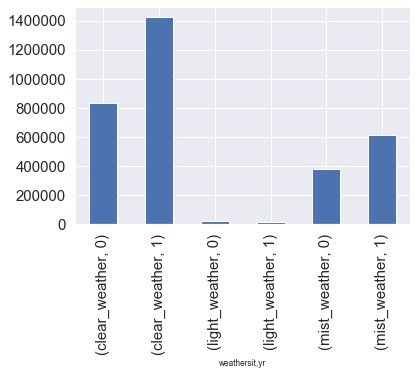

In [28]:
bikes.groupby(['weathersit','yr'])['cnt'].sum().plot.bar(fontsize =15)
plt.show()

Most of the bikes are rented on a clear weather days of 2019, followed by same weather condition of 2018.<br>
Also, the light_weather conditions are the least favourable for bike renting.

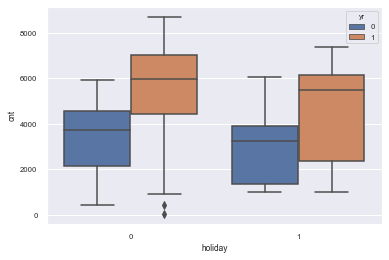

In [29]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes, hue='yr')
plt.show()

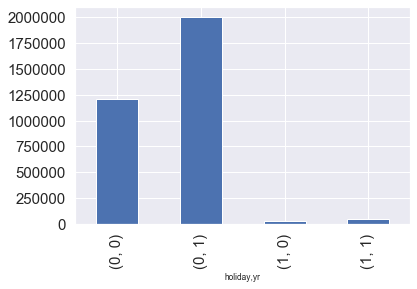

In [30]:
bikes.groupby(['holiday','yr'])['cnt'].sum().plot.bar(fontsize =15)
plt.show()

Non holidays of 2019 were with the highest total cnt.

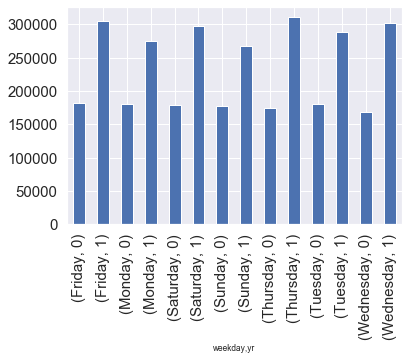

In [31]:
bikes.groupby(['weekday','yr'])['cnt'].sum().plot.bar(fontsize=15)
plt.show()

Out of these two years, most of the bikes are rented on `Thursday of 2019` followed by `Fridays of 2019` and `Wednesdays of 2019`.  Least sum is obtained on `Wednesdays of 2018`.

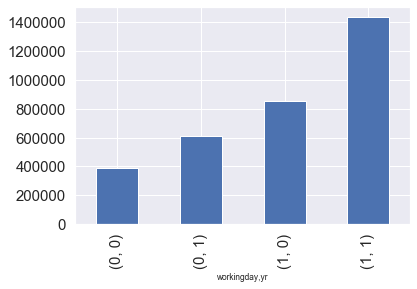

In [32]:
bikes.groupby(['workingday','yr'])['cnt'].sum().plot.bar(fontsize=15)
plt.show()

Most of the bikes are rented on a working day in both years . Non working days of 2018 experienced the least count in total.

## Step 3: Data Preparation

### Dummy Variables Creation  <br>
For features:: season, weathersit, mnth,weekday

The variable `season` has four levels.

In [33]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,Jan,0,Saturday,0,mist_weather,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Sunday,0,mist_weather,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,Jan,0,Monday,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Tuesday,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Wednesday,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600,4


In [34]:
# Get the dummy variables for the feature and store it in a new variable - 'status'
status = pd.get_dummies(bikes['season'])
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [35]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(bikes['season'], drop_first = True)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
# Add the results to the original day dataframe
bikes = pd.concat([bikes, status], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,mist_weather,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,spring,0,Jan,0,Sunday,0,mist_weather,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,spring,0,Jan,0,Monday,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0
3,spring,0,Jan,0,Tuesday,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0
4,spring,0,Jan,0,Wednesday,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0


In [37]:
#The original column 'season' is not needed now
bikes=bikes.drop('season', axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old,spring,summer,winter
0,0,Jan,0,Saturday,0,mist_weather,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,Jan,0,Sunday,0,mist_weather,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,0,Jan,0,Monday,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0
3,0,Jan,0,Tuesday,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0
4,0,Jan,0,Wednesday,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0


The variable `weathersit` has four levels. For this, we will also use `dummy variables`.

In [38]:
status = pd.get_dummies(bikes['weathersit'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes=bikes.drop('weathersit', axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,days_old,spring,summer,winter,light_weather,mist_weather
0,0,Jan,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1
1,0,Jan,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,1
2,0,Jan,0,Monday,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,0
3,0,Jan,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,0
4,0,Jan,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,0


The variable `weekday` has seven levels. For this, we will also use `dummy variables`.

In [39]:
status = pd.get_dummies(bikes['weekday'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes=bikes.drop('weekday', axis=1)
bikes.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,...,summer,winter,light_weather,mist_weather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,...,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,...,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,...,0,0,0,0,0,0,0,0,0,1


The variable `mnth` has twelve levels. For this, we will also use `dummy variables`.

In [40]:
status = pd.get_dummies(bikes['mnth'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes=bikes.drop('mnth', axis=1)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,1,0,0,0,0,0,0,0


In [41]:
#inspecting the 31 columns till now:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'spring', 'summer', 'winter', 'light_weather',
       'mist_weather', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

## Step 4:  Splitting the Data into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 42)

#### Rescaling the Features <br>   
We will use MinMax scaling.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt','days_old']
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0.936900,0,...,0,0,0,0,0,0,0,1,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0.884774,0,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0.223594,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0.493827,1,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0.877915,0,...,0,0,0,0,0,0,0,0,1,0


### Dividing into X and y sets for the model building

In [45]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [46]:
y_train

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
         ...   
700    0.509236
71     0.239768
106    0.399976
270    0.419655
435    0.587589
Name: cnt, Length: 510, dtype: float64

In [47]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,1,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,1,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1,0,0,0.359323,0.367719,0.848432,0.255447,0.960219,0,0,...,1,0,0,0,0,0,0,0,0,0
71,0,0,0,0.405237,0.395131,0.543468,0.621696,0.097394,1,0,...,0,0,0,0,0,1,0,0,0,0
106,0,0,0,0.495350,0.481247,0.494203,0.704080,0.145405,0,1,...,0,0,0,0,0,0,0,0,0,0
270,0,0,1,0.717562,0.651183,0.874624,0.316186,0.370370,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 5 :  Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('spring', True, 1),
 ('summer', False, 19),
 ('winter', False, 2),
 ('light_weather', True, 1),
 ('mist_weather', False, 4),
 ('Monday', False, 17),
 ('Saturday', False, 7),
 ('Sunday', False, 15),
 ('Thursday', False, 21),
 ('Tuesday', False, 14),
 ('Wednesday', False, 20),
 ('Aug', False, 11),
 ('Dec', False, 9),
 ('Feb', False, 16),
 ('Jan', False, 13),
 ('July', False, 18),
 ('June', False, 12),
 ('Mar', False, 5),
 ('May', False, 6),
 ('Nov', False, 10),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'days_old', 'spring',
       'light_weather', 'Oct', 'Sep'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'summer', 'winter', 'mist_weather', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov'],
      dtype='object')

In [53]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.513139,0.231373,0.256863,...,0.074510,0.074510,0.088235,0.092157,0.084314,0.062745,0.092157,0.092157,0.090196,0.090196
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.292087,0.422124,0.437332,...,0.262857,0.262857,0.283915,0.289531,0.278131,0.242742,0.289531,0.289531,0.286744,0.286744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.255487,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.523320,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.770576,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#####   Building model using statsmodel, for the detailed statistics

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
#building the linear model
lm=sm.OLS(y_train, X_train_rfe).fit()
#Printing the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.67e-181
Time:                        20:02:23   Log-Likelihood:                 460.99
No. Observations:                 510   AIC:                            -900.0
Df Residuals:                     499   BIC:                            -853.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4476      0.036     12.579      0.000       0.378       0.518
yr                0.2650      0.023     11.741      0.000       0.221       0.309
holiday          -0.0787      0.027     -2.909      0.004      -0.132      -0.026
atemp             0.4124      0.029     14.335      0.000       0.356       0.469
hum              -0.2751      0.034     -8.102      0.000      -0.342      -0.208
windspeed        -0.1439      0.026     -5.633      0.000      -0.194      -0.094
days_old         -0.0650      0.041     -1.590      0.112      -0.145       0.015
spring           -0.1845      0.017    -11.115      0.000      -0.217      -0.152
light_weather    -0.1750      0.028     -6.341      0.000      -0.229      -0.121
Oct               0.1037      0.017      6.277      0.000       0.071       0.136
Sep               0.0965      0.016      5.918      0.000       0.064       0.129
==============================================================================
Omnibus:                       88.734   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.594
Skew:                          -0.970   Prob(JB):                     7.42e-39
Kurtosis:                       5.122   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`days_old` has high p value , as it is insignificant in comparison to other variables. So it can be dropped

In [56]:
X_train_new= X_train_rfe.drop('days_old', axis =1)

In [57]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring',
       'light_weather', 'Oct', 'Sep'],
      dtype='object')

Rebuilding a model without `days_old`

In [58]:
#Adding a constant to the model
X_train_lm= sm.add_constant(X_train_new)
X_train_lm.head()

,const,yr,holiday,atemp,hum,windspeed,spring,light_weather,Oct,Sep
683,1.0,1,0,0.322150,0.639330,0.327101,0,0,0,0
645,1.0,1,1,0.404998,0.731215,0.419004,0,0,1,0
163,1.0,0,0,0.685963,0.509660,0.708724,0,0,0,0
360,1.0,0,0,0.326273,0.785745,0.415925,1,0,0,0
640,1.0,1,0,0.682653,0.817947,0.110593,0,0,1,0


In [59]:
#Running the linear model
lm=sm.OLS(y_train, X_train_lm).fit()
#Checking the summary statistics now
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          7.79e-182
Time:                        20:02:24   Log-Likelihood:                 459.70
No. Observations:                 510   AIC:                            -899.4
Df Residuals:                     500   BIC:                            -857.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4242      0.032     13.073

In [60]:
X_train_lm=X_train_lm.drop('const', axis=1)

In [61]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,12.12
2,atemp,9.65
4,windspeed,4.80
0,yr,2.05
5,spring,1.96
7,Oct,1.20
8,Sep,1.19
6,light_weather,1.13
1,holiday,1.04


Dropping the variable `hum` as it has high VIF value.

In [62]:
X_train_lm= X_train_lm.drop('hum', axis=1)
X_train_lm.head()

,yr,holiday,atemp,windspeed,spring,light_weather,Oct,Sep
683,1,0,0.322150,0.327101,0,0,0,0
645,1,1,0.404998,0.419004,0,0,1,0
163,0,0,0.685963,0.708724,0,0,0,0
360,0,0,0.326273,0.415925,1,0,0,0
640,1,0,0.682653,0.110593,0,0,1,0


In [63]:
#Adding a constant to the model
X_train_lm= sm.add_constant(X_train_lm)
X_train_lm.head()

,const,yr,holiday,atemp,windspeed,spring,light_weather,Oct,Sep
683,1.0,1,0,0.322150,0.327101,0,0,0,0
645,1.0,1,1,0.404998,0.419004,0,0,1,0
163,1.0,0,0,0.685963,0.708724,0,0,0,0
360,1.0,0,0,0.326273,0.415925,1,0,0,0
640,1.0,1,0,0.682653,0.110593,0,0,1,0


In [64]:
#Running the linear model
lm=sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.10e-169
Time:                        20:02:24   Log-Likelihood:                 427.15
No. Observations:                 510   AIC:                            -836.3
Df Residuals:                     501   BIC:                            -798.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2265      0.023      9.723      0.000       0.181       0.272
yr                0.2390      0.009     25.422      0.000       0.221       0.257
holiday          -0.0800      0.029     -2.775      0.006      -0.137      -0.023
atemp             0.4102      0.030     13.777      0.000       0.352       0.469
windspeed        -0.0852      0.026     -3.267      0.001      -0.136      -0.034
spring           -0.1663      0.015    -11.072      0.000      -0.196      -0.137
light_weather    -0.2398      0.028     -8.490      0.000      -0.295      -0.184
Oct               0.0828      0.017      4.876      0.000       0.049       0.116
Sep               0.0736      0.017      4.358      0.000       0.040       0.107
==============================================================================
Omnibus:                       87.575   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.704
Skew:                          -0.970   Prob(JB):                     2.32e-37
Kurtosis:                       5.044   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_train_lm=X_train_lm.drop('const', axis=1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.46
2,atemp,4.16
0,yr,2.04
4,spring,1.56
7,Sep,1.17
6,Oct,1.13
5,light_weather,1.07
1,holiday,1.04


In [67]:
X_train_lm=sm.add_constant(X_train_lm)

### Checking various assumptions:

#### Normality assumption

In [70]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

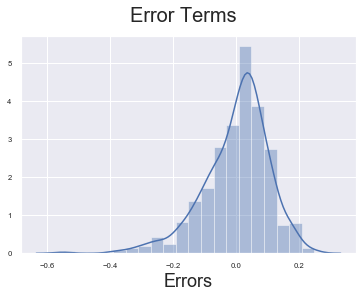

In [73]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

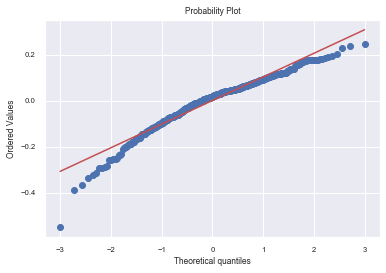

In [74]:
import pylab
import scipy.stats as stats

errors = y_train - y_train_cnt   
stats.probplot(errors, dist="norm", plot=pylab)
pylab.show()

#### Making Predictions

Applying the scaling on the test data

In [75]:
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt','days_old']
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

In [76]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[col]
X_test_new= X_test[['yr','holiday','atemp', 'windspeed', 'spring','light_weather', 'Oct', 'Sep']]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7879201191513274

#### Model evaluation

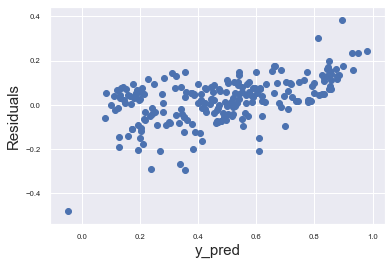

In [80]:
#Check the patterns in the error terms
res= y_test - y_pred
fig= plt.figure()
plt.scatter(y_test, res)
plt.xlabel("y_pred", fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.show()

No pattern is observed. Hence its good to consider.

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### `We can see that the equation of our best fitted line is:` <br>

$ cnt = 0.2390  \times  yr + 0.08  \times  holiday + 0.4102 \times atemp - 0.852 \times windspeed - 0.1663 \times spring - 0.2398 \times light_weather + 0.0828 \times Oct + 0.0736 \times Sep  $

#### Significant variables, in the order of their importance are as follows: <br>
- atemp
- light_weather
- yr
- spring
- Oct
- windspeed
- holiday
- Sep


`atemp` : coefficient of atemp in the equation above is 0.4102. It indicates that when there is unit increase in atemp, the output cnt is estimated to increase by 0.4102 units, keeping all the other attributes constant. <br>
`light_weather`: coefficient is -0.2398. Clear_weather and mist_weather are both less likely to affect the cnt variable. Whereas light_weather conditions, adversely affect the cnt. If its value become true, i.e 1, there will be decline in the value of cnt by 0.2398 units. <br>
`yr`: coefficient is 0.2390. It indicates that the year 2019 was favoring the target variable cnt. It means in 2019, there is increase in the cnt variable by 0.2390 units in comparison to 2018 year keeping the other attributes intact.<br>
Similarly we can interpret for other